<a href="https://colab.research.google.com/github/LeonardoMonte/ListasProcessamentoDeImagens2019.2/blob/master/ListaExercicioProcessamentoImagemLeonardoMonte2019_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/LeonardoMonte/ListasProcessamentoDeImagens2019.2.git
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
%matplotlib inline
from matplotlib import pyplot as plt

fatal: destination path 'ListasProcessamentoDeImagens2019.2' already exists and is not an empty directory.


## Questão 1

In [0]:
def convfilter(source,kernel):
  
  xkernel,ykernel = np.array(kernel).shape[0],np.array(kernel).shape[1]
  source = np.pad(source,(xkernel-2,ykernel-2),'constant')
  xcor,ycor = np.array(source).shape[0],np.array(source).shape[1]
  returno = np.zeros((xcor-2,ycor-2))
  aux = np.zeros((xkernel,ykernel))

  for x in range(xcor-(xkernel-1)):

    for y in range(ycor-(ykernel-1)):
      auxx = x
      for z in range(xkernel):
        auxy = y
        for w in range(ykernel):
          aux[z][w] = source[auxx][auxy]
          auxy += 1
        auxx +=1
    
      trade = np.sum(np.multiply(kernel,aux))
      returno[x][y] = int(trade)
    
  return returno

def convfiltermediana(source,xkernel,ykernel):

  xcor,ycor = np.array(source).shape[0],np.array(source).shape[1]
  source = np.pad(source,(xkernel-2,ykernel-2),'constant')
  returno = np.zeros((xcor-2,ycor-2))
  aux = np.zeros((xkernel,ykernel))

  for x in range(xcor-(xkernel-1)):

    for y in range(ycor-(ykernel-1)):
      auxx = x
      for z in range(xkernel):
        auxy = y
        for w in range(ykernel):
          aux[z][w] = source[auxx][auxy]
          auxy += 1
        auxx +=1

      trade = np.median(np.sort(aux.ravel()))
      returno[x][y] = int(trade)

  return returno

#IMG LOAD
img1 = cv2.imread('ListasProcessamentoDeImagens2019.2/ListaPratica/datasetlista/img1.jpg',0)

# KERNEL MEAN
meankernel3 = np.ones((3,3),np.float32)/9
meankernel7 = np.ones((7,7),np.float32)/49
meankernel9 = np.ones((9,9),np.float32)/81

#FILTER APLIES
mean3img = convfilter(img1,meankernel3)
mean7img = convfilter(img1,meankernel7)
mean9img = convfilter(img1,meankernel9)

# confilter function does also work for gaussian blur, but you have to 
# know the kernel values to pass to the functin, so i prefered to use the 
# opencv version

gaussian3img = cv2.GaussianBlur(img1,(3,3),0)
gaussian7img = cv2.GaussianBlur(img1,(7,7),0)
gaussian9img = cv2.GaussianBlur(img1,(9,9),0)

median3img = convfiltermediana(img1,3,3)
median7img = convfiltermediana(img1,7,7)
median9img = convfiltermediana(img1,9,9)

#IMAGES PRINT
print("ORIGINAL IMAGE")
cv2_imshow(img1)
print("MEAN 3x3")
cv2_imshow(mean3img)
print("MEAN 7x7")
cv2_imshow(mean7img)
print("MEAN 9x9")
cv2_imshow(mean9img)
print("GAUSSIAN 3x3")
cv2_imshow(gaussian3img)
print("GAUSSIAN 7x7")
cv2_imshow(gaussian7img)
print("GAUSSIAN 9x9")
cv2_imshow(gaussian9img)
print("MEDIAN 3x3")
cv2_imshow(median3img)
print("MEDIAN 7X7")
cv2_imshow(median7img)
print("MEDIAN 9X9")
cv2_imshow(median9img)



## Quetão 2

In [0]:
# MEDIAN FILTER IS THE BEST FILTER FOR SALT AND PEPER NOISE REMOVING

# cv2.medianBlur(noise,3) the function in opencv that is equal to confiltermediana(img2,3,3)

img2 = cv2.imread('ListasProcessamentoDeImagens2019.2/ListaPratica/datasetlista/img2.jpg',0)
img2spremove3 = convfiltermediana(img2,3,3)
img2spremove5 = convfiltermediana(img2,5,5)
img2spremove7 = convfiltermediana(img2,7,7)
img2spremove9 = convfiltermediana(img2,9,9)

print("ORIGINAL")
cv2_imshow(img2)
print("MEDIAN 3x3")
cv2_imshow(img2spremove3)
print("MEDIAN 5x5")
cv2_imshow(img2spremove5)
print("MEDIAN 7x7")
cv2_imshow(img2spremove7)
print("MEDIAN 9x9")
cv2_imshow(img2spremove9)

## Questão 3

In [0]:
img3 = cv2.imread('ListasProcessamentoDeImagens2019.2/ListaPratica/datasetlista/img3.jpg',0)

# KERNEL VALUES FOR SOBEL
horizontalsobel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
verticalsobel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])

# KERNEL VALUES FOR PREWIT
horizontalprewit = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
verticalprewit = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

# KERNEL VALUES LAPLACIAN
laplacian3 = np.array([[0,1,0],[1,-4,1],[0,1,0]])
laplacian4 = np.array([[0,1,1,0],[1,-2,-2,1],[1,-2,-2,1],[0,1,1,0]])

hsobelimg = convfilter(img3,horizontalsobel)
vsobelimg = convfilter(img3,verticalsobel)
hprewitimg = convfilter(img3,horizontalprewit)
vprewitimg = convfilter(img3,verticalprewit)
laplacian3img = convfilter(img3,laplacian3)
laplacian4img = convfilter(img3,laplacian4)

print("ORIGINAL")
cv2_imshow(img3)
print("HORIZONTAL SOBEL")
cv2_imshow(hsobelimg)
print("HORIZONTAL PREWIT")
cv2_imshow(hprewitimg)
print("VERTICAL SOBEL")
cv2_imshow(vsobelimg)
print("VERTICAL PREWIT")
cv2_imshow(vprewitimg)
print("LAPLACIAN 3x3")
cv2_imshow(laplacian3img)
print("LAPLACIAN 4x4")
cv2_imshow(laplacian4img)

## Questão 4

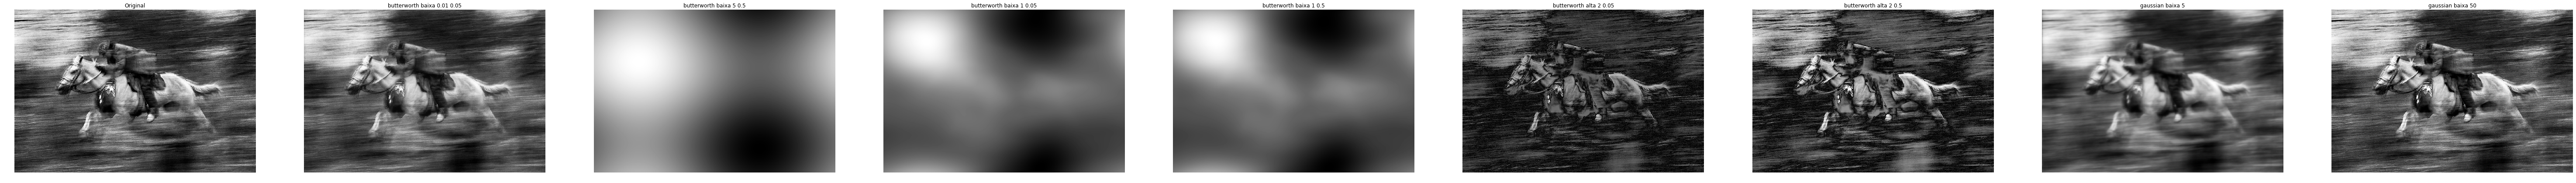

In [0]:
img4 = cv2.imread('ListasProcessamentoDeImagens2019.2/ListaPratica/datasetlista/img4.jpg',0)

def butterworth(source,nvalue,d0,value):
  x_size, y_size = source.shape
  x_arr, y_arr = np.mgrid[0:x_size, 0:y_size]
  cell = (x_size//2, y_size//2)
  dists = np.sqrt((x_arr - cell[0])**2 + (y_arr - cell[1])**2)

  #equação da butterworth
  arg= np.divide(dists,d0);
  arg = 1 + (arg**(2*nvalue))
  filtg=1/arg;  

  #cria máscara 
  mask = np.zeros((x_size,y_size,2))
  mask[:,:,0] = filtg
  mask[:,:,1] = filtg
  
  if value == 1:
    mask = 1-mask

  dft = cv2.dft(np.float32(source),flags = cv2.DFT_COMPLEX_OUTPUT) #transformada discreta de fourier
  dft_shift = np.fft.fftshift(dft)
  # aplica a filtragem gaussiana
  fshift = dft_shift*mask
  # transformada inversa
  f_ishift = np.fft.ifftshift(fshift)
  img_back = cv2.idft(f_ishift)
  #cv2_imshow(img_back[:,:,0])
  #cv2_imshow(img_back[:,:,1])
  img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

  return img_back

def gaussian(source,sigma,value):
  x_size, y_size = source.shape
  x_arr, y_arr = np.mgrid[0:x_size, 0:y_size]
  cell = (x_size//2, y_size//2)
  dists = np.sqrt((x_arr - cell[0])**2 + (y_arr - cell[1])**2)

  #equação da butterworth
  u = 2*(sigma**2)
  arg = -np.divide(dists,u);
  filtg = np.exp(arg);  

  #cria máscara 
  mask = np.zeros((x_size,y_size,2))
  mask[:,:,0] = filtg
  mask[:,:,1] = filtg
  
  if value == 1:
    mask = 1-mask

  dft = cv2.dft(np.float32(source),flags = cv2.DFT_COMPLEX_OUTPUT) #transformada discreta de fourier
  dft_shift = np.fft.fftshift(dft)
  # aplica a filtragem gaussiana
  fshift = dft_shift*mask
  #cv2_imshow(fshift[:,:,0])
  # transformada inversa
  f_ishift = np.fft.ifftshift(fshift)
  img_back = cv2.idft(f_ishift)
  img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

  return img_back



imgb1baixa = butterworth(img4,0.01,0.05,0)
imgb2baixa = butterworth(img4,5,0.5,0)
imgb3baixa = butterworth(img4,1,0.05,0)
imgb4baixa = butterworth(img4,1,0.5,0)

imgb1alta = butterworth(img4,2,0.05,1)
imgb2alta = butterworth(img4,2,0.5,1)

imgg1baixa = gaussian(img4,5,0)
imgg2baixa = gaussian(img4,50,0)

fig, axes = plt.subplots(1, 9, figsize=(105, 156))
ax = axes.ravel()

ax[0].imshow(img4, cmap='gray')
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(imgb1baixa, cmap='gray')
ax[1].set_title('butterworth baixa 0.01 0.05')
ax[1].set_axis_off()

ax[2].imshow(imgb2baixa, cmap='gray')
ax[2].set_title('butterworth baixa 5 0.5')
ax[2].set_axis_off()

ax[3].imshow(imgb3baixa, cmap='gray')
ax[3].set_title('butterworth baixa 1 0.05')
ax[3].set_axis_off()

ax[4].imshow(imgb4baixa, cmap='gray')
ax[4].set_title('butterworth baixa 1 0.5')
ax[4].set_axis_off()

ax[5].imshow(imgb1alta, cmap='gray')
ax[5].set_title('butterworth alta 2 0.05')
ax[5].set_axis_off()

ax[6].imshow(imgb2alta, cmap='gray')
ax[6].set_title('butterworth alta 2 0.5')
ax[6].set_axis_off()

ax[7].imshow(imgg1baixa, cmap='gray')
ax[7].set_title('gaussian baixa 5')
ax[7].set_axis_off()

ax[8].imshow(imgg2baixa, cmap='gray')
ax[8].set_title('gaussian baixa 50')
ax[8].set_axis_off()


#Questão 5

In [0]:
img5 = cv2.imread('ListasProcessamentoDeImagens2019.2/ListaPratica/datasetlista/img5.jpg')


#DETALHE IMPORTANTE, A IMAGEM É CAREGADA NO FORMATO BGR E NÃO RGB, LOGO FICA AO CONTRARIO

def rgbtosepia(source):
  
  retorno = np.zeros((source.shape[0],source.shape[1],source.shape[2]))

  for x in range(source.shape[0]):
    for y in range(source.shape[1]):
      tr = (source[x,y,2]*0.393)+(source[x,y,1]*0.769)+(source[x,y,0]*0.189)
      tg = (source[x,y,2]*0.349)+(source[x,y,1]*0.686)+(source[x,y,0]*0.168)
      tb = (source[x,y,2]*0.272)+(source[x,y,1]*0.534)+(source[x,y,0]*0.131)

      if tr > 255:
        retorno[x,y,2] = 255
      else:
        retorno[x,y,2] = tr     
      if tg > 255:
        retorno[x,y,1] = 255
      else:
        retorno[x,y,1] = tg
      
      if tb > 255:
        retorno[x,y,0] = 255
      else:
        retorno[x,y,0] = tb

  return retorno

sepia = rgbtosepia(img5)
cv2_imshow(img5)
cv2_imshow(sepia)
 

# Questão 6

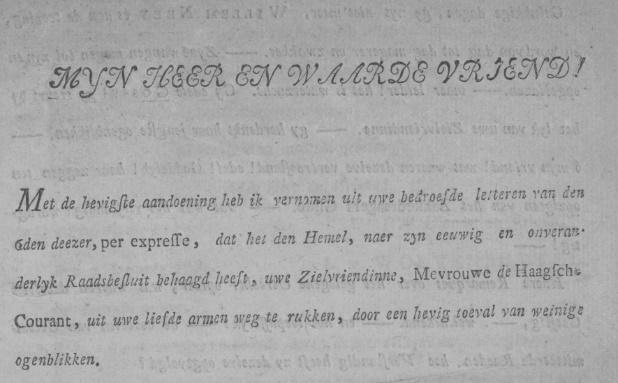

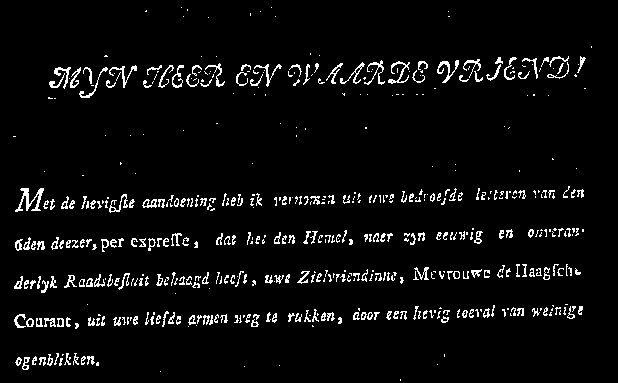

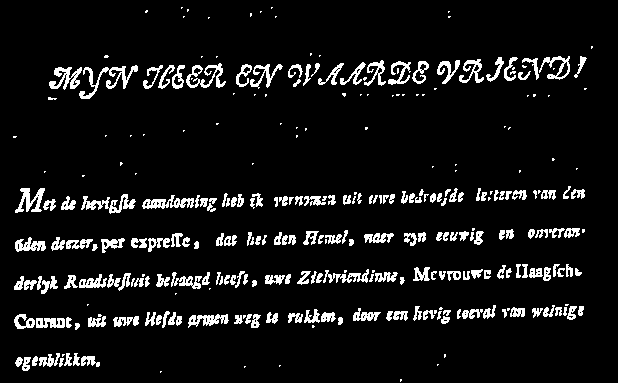

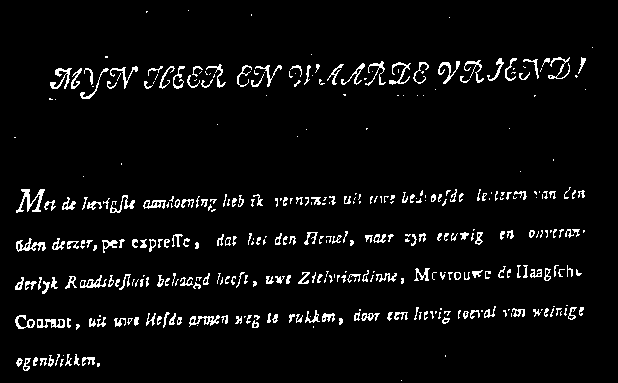

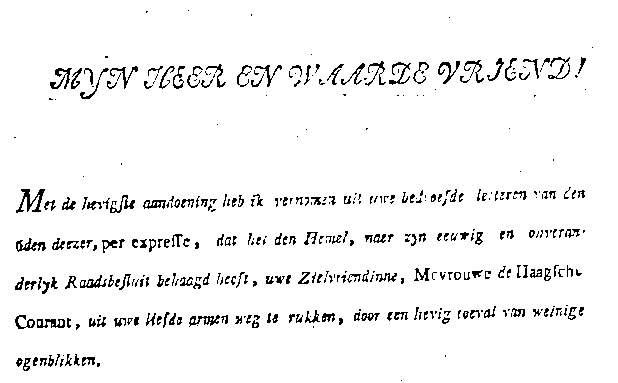

In [0]:
img6 = cv2.imread('ListasProcessamentoDeImagens2019.2/ListaPratica/datasetlista/img6.jpg',0)
cv2_imshow(img6)
kernelRECT = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
kernelELLIPSE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
kernelCROSS = cv2.getStructuringElement(cv2.MORPH_CROSS,(2,2))

img6b = cv2.adaptiveThreshold(img6,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,71,27)
cv2_imshow(img6b)

img6b = cv2.dilate(img6b,kernelCROSS,iterations = 1)
cv2_imshow(img6b)
img6b = cv2.erode(img6b,kernelCROSS,iterations = 1)
cv2_imshow(img6b)

img6b = 255-img6b
#img6b = convfiltermediana(img6b,3,3)
cv2_imshow(img6b)

